In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

%cd -q /mnt/c/projects/ecorp-recommendations/src
from helpers import read_dataset
from helpersEDA import quick_observation, missing_df, unique_values

In [2]:
%cd -q /mnt/c/projects/ecorp-recommendations/data
trans_all = read_dataset('alltransactions.txt', file_type='tsv')

--------- Reading in the dataset: alltransactions.txt ---------

The number instances: 2107537
The number of columns: 6

The datatypes of features:
order_number     int64
l1              object
l2              object
l3              object
sku              int64
brand            int64
dtype: object


In [3]:
# look at quick observation of dataframe, and any duplicated rows
quick_observation(trans_all, subset=None)  

------The first 5 rows:
   order_number                                      l1  \
0        168266                             Power Tools   
1        123986                                  Safety   
2        158978                                Hardware   
3        449035  Electronics, Appliances, and Batteries   
4        781232                                  Motors   

                           l2                         l3     sku  brand  
0  Power Saws and Accessories   Reciprocating Saw Blades  265105   2768  
1      Spill Control Supplies      Temporary Leak Repair  215839    586  
2               Door Hardware                 Thresholds  284756   1793  
3                   Batteries         Standard Batteries   12579   1231  
4   General Purpose AC Motors  General Purpose AC Motors  194681   2603  

------The number of duplicates: 52070


In [4]:
# note l3 is the most speciic, l1 the most general
# need to remove duplicates when we process data for rec engine

# check to see if there are any missing values
missing_df(trans_all, 0)

The dataset does not contain any missing values


In [5]:
# check how many different orders in this dataset, along w/ unique values from other features
for col in trans_all.columns:
    unique_values(trans_all, col)

order_number: 801575 --- unique values
l1: 33 --- unique values
l2: 593 --- unique values
l3: 6203 --- unique values
sku: 275958 --- unique values
brand: 4574 --- unique values


In [6]:
# list the top popular items (the first 10)
# this listing could be the simplest recommendation system - generalized to every user based on the 
# popularity, but we will do better - something more personalized
trans_all.groupby(['sku', 'l3'])[
    'order_number'].count().sort_values(ascending=False)[:10]

sku     l3                 
282471  Standard Batteries     9234
282473  Standard Batteries     7408
154210  Socks                  5721
184171  Paper Towels, Rolls    4965
282469  Standard Batteries     4210
124761  Pleated Air Filters    3261
124763  Pleated Air Filters    3169
46844   Toilet Paper           2955
124762  Pleated Air Filters    2933
282470  Standard Batteries     2831
Name: order_number, dtype: int64

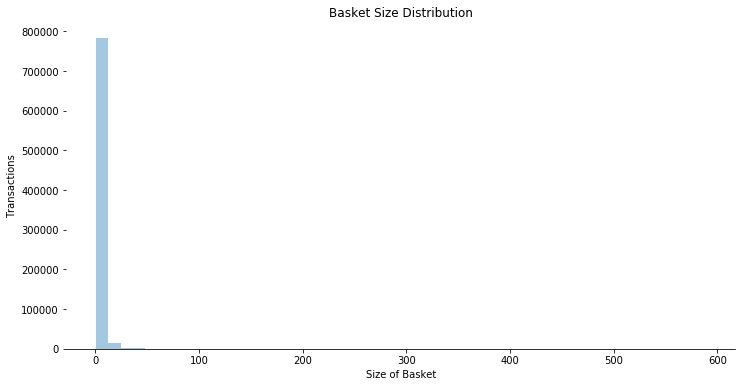

Basket size description:

count    801575.000000
mean          2.629245
std           4.611330
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max         588.000000
Name: sku, dtype: float64


In [33]:
# look at distribution of basket sizes for this 2-week period
plt.figure(figsize=(12, 6))
sns.distplot(trans_all.groupby('order_number')['order_number'].count(), kde=False)
sns.despine(left=True)
plt.xlabel('Size of Basket')
plt.ylabel('Transactions')
plt.title('Basket Size Distribution')
plt.show()

print('Basket size description:\n\n{}'.format(
    trans_all.groupby('order_number')['sku'].count().describe()))

In [8]:
# when we build rec engine, consider orders that have at least 2 items
# not much more to explore for building rec system

In [26]:
t = trans_all[trans_all.groupby('order_number')['order_number'].transform(len) >= 2]

In [34]:
t.shape

(1663534, 6)

In [35]:
l3_dummy = pd.get_dummies(t['l3'])

In [38]:
td = pd.concat([t, l3_dummy], axis=1)

In [41]:
td.drop(['l1', 'l2', 'l3', 'sku', 'brand'], axis=1, inplace=True)

In [42]:
td.head()

,order_number,12 Volt Accessories,12-Point Flange Head Cap Screws,3-Ring Binder Accessories,3-Ring Binders,3.3 Inch Diameter Motors,3D Printing Materials,4.4 Inch Diameter Motors,5 X 20mm Glass and Ceramic Fuses,50 Hz Motors,...,Wrist Supports and Wraps,Writing Instrument Accessories,Y Strainers,Yard Hydrants,Yoke Ends,Zone Valve Accessories,Zone Valve Actuators,Zone Valves,Zoning Dampers,pH Meters
0,168266,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,158978,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,449035,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,116599,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,701116,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
td.shape

(1663534, 5851)

In [ ]:
td.groupby('order_number').sum()

In [44]:
td_feats = list(td.columns)
td_feats.remove('order_number')
td.groupby('order_number').sum()[td_feats].reset_index()

KeyboardInterrupt: 